# Vizualize Diff of contexts
* For all of the metrics one by one

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

## load daa

In [3]:
metric = 'SIM'

In [4]:
df = pd.read_csv(metric+'_mean_noface.csv', index_col=[0])
df_f03 = pd.read_csv(metric+'_mean_face_03.csv', index_col=[0])
df_f05 = pd.read_csv(metric+'_mean_face_05.csv', index_col=[0])
df_f07 = pd.read_csv(metric+'_mean_face_07.csv', index_col=[0])

### Calculate means

In [5]:
def calc_means(df):
    df = df.transpose()
    df['mean model'] = df.mean(axis=1)
    df = df.transpose()
    df['mean context'] = df.mean(axis=1)
    return df

In [6]:
df0 = df.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
df0

,all,person,no person,animal,sports,electronic
aim,0.394616,0.364064,0.451696,0.335876,0.323169,0.396621
cas,0.495140,0.472677,0.537109,0.430710,0.476040,0.478320
covsal,0.502877,0.487883,0.530890,0.486593,0.474478,0.483885
gbvs,0.542515,0.512920,0.597809,0.487240,0.499293,0.534094
icf,0.519075,0.498890,0.556787,0.457074,0.483482,0.505949
ik,0.445675,0.426353,0.481492,0.396768,0.413913,0.446081
sun,0.419288,0.387883,0.477965,0.346989,0.346531,0.419481


In [7]:
df_f07

,all,person,no person,animal,sports,electronic
aim,0.401552,0.374624,0.451864,0.338444,0.327447,0.406648
cas,0.508505,0.493141,0.537210,0.435842,0.484921,0.498240
covsal,0.523280,0.519233,0.530842,0.495003,0.489361,0.514306
gbvs,0.555403,0.532713,0.597796,0.492372,0.508165,0.553327
icf,0.532480,0.519504,0.556726,0.461936,0.493354,0.526419
ik,0.465300,0.456548,0.481563,0.404780,0.426578,0.474942
sun,0.437632,0.416026,0.477998,0.354048,0.358206,0.447081


In [8]:
df_diff_f03 = ((df_f03 - df0) / df0)*100
df_diff_f05 = ((df_f05 - df0) / df0)*100
df_diff_f07 = ((df_f07 - df0) / df0)*100

In [9]:
df_diff_f03

,all,person,no person,animal,sports,electronic
aim,0.352463,0.579183,0.011054,0.148267,0.258310,0.498498
cas,0.646386,1.030109,0.015467,0.268749,0.436712,0.976482
covsal,1.583467,2.484916,0.035701,0.607749,1.093867,2.391615
gbvs,0.590822,0.953658,0.009187,0.243632,0.417840,0.878401
icf,0.910531,1.445467,0.015018,0.380668,0.710761,1.392239
ik,1.343155,2.151605,0.031601,0.569129,0.827165,1.992483
sun,1.180773,1.942778,0.025417,0.510818,0.845297,1.775791


In [10]:
df_diff_f03 = calc_means(df_diff_f03)
df_diff_f05 = calc_means(df_diff_f05)
df_diff_f07 = calc_means(df_diff_f07)

In [11]:
df_diff_f07

,all,person,no person,animal,sports,electronic,mean context
aim,1.757891,2.900518,0.037252,0.764368,1.323728,2.528091,1.551975
cas,2.699175,4.329313,0.018894,1.191430,1.865571,4.164496,2.378147
covsal,4.057314,6.425719,-0.009181,1.728370,3.136675,6.286685,3.604264
gbvs,2.375651,3.859017,-0.002222,1.053379,1.776966,3.601078,2.110645
icf,2.582584,4.131900,-0.011054,1.063754,2.041753,4.045896,2.309139
ik,4.403304,7.082146,0.014683,2.019441,3.059803,6.469857,3.841539
sun,4.374898,7.255685,0.007030,2.034144,3.369198,6.579609,3.936761
mean model,3.178688,5.140614,0.007914,1.407841,2.367671,4.810816,2.818924


In [12]:
mean_context_diff_f03 = df_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = df_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = df_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
aim,0.307962,0.702586,1.551975
cas,0.562317,1.217946,2.378147
covsal,1.366219,2.600219,3.604264
gbvs,0.515590,1.107627,2.110645
icf,0.809114,1.521739,2.309139
ik,1.152523,2.375002,3.841539
sun,1.046812,2.196339,3.936761
mean model,0.822934,1.674494,2.818924


In [14]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
mean_context_diff.index = mean_context_diff.index.str.upper()


In [18]:
matplotlib.rcParams.update({'font.size': 27})

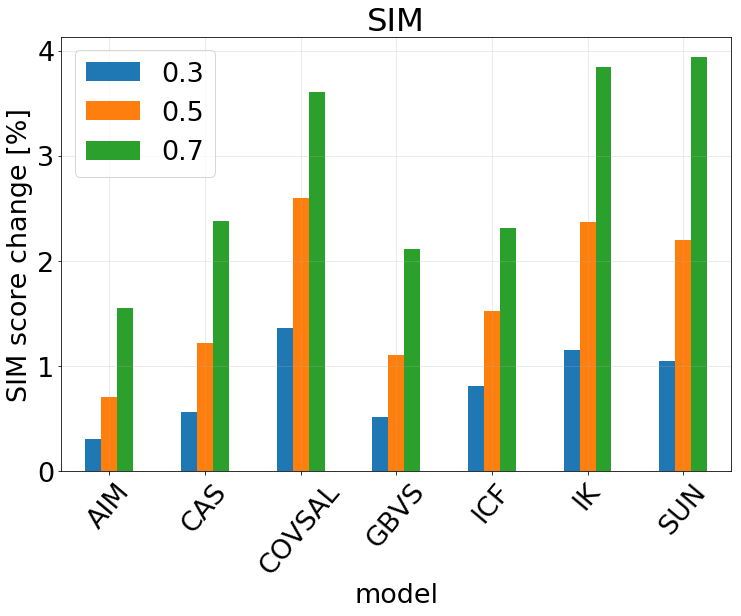

In [19]:
fig, ax = plt.subplots(figsize=(12,8));
mean_context_diff.plot.bar(ax=ax);
plt.grid(alpha=0.3)
plt.title('SIM')
plt.ylabel(metric+' score change [%]');
plt.xlabel('model')
plt.xticks(rotation=50)

plt.savefig('../plots/'+metric+'_improvment_mean_contexts.png', bbox_inches='tight', pad_inches=0)

In [20]:
mean_model_diff_f03 = df_diff_f03.loc['mean model']
mean_model_diff_f05 = df_diff_f05.loc['mean model']
mean_model_diff_f07 = df_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
all,0.943942,1.903947,3.178688
person,1.512531,3.061736,5.140614
no person,0.020492,0.024745,0.007914
animal,0.389859,0.810500,1.407841
sports,0.655707,1.363614,2.367671
electronic,1.415073,2.882423,4.810816
mean context,0.822934,1.674494,2.818924


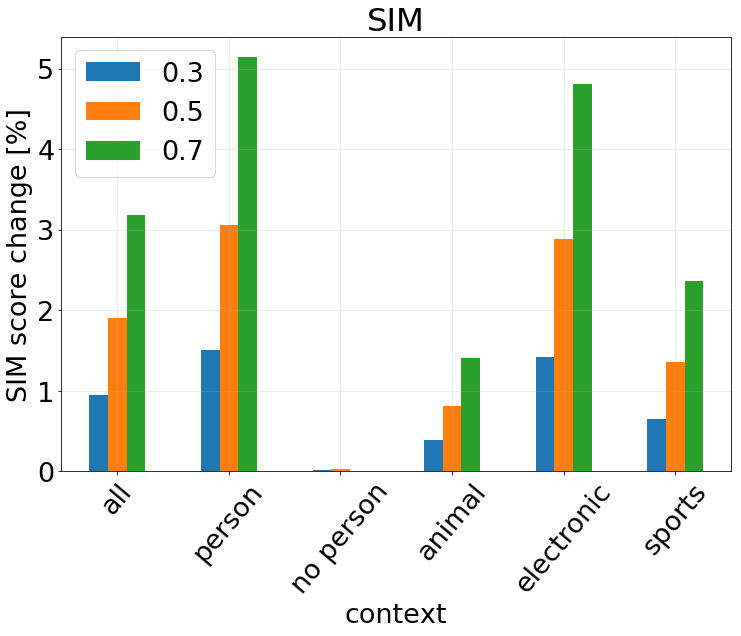

In [21]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(12,8));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

plt.title('SIM')
plt.ylabel(metric+' score change [%]');
plt.xlabel('context')
plt.xticks(rotation=50)

plt.savefig('../plots/'+metric+'_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)

##### 